[![Open Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ya_T3JQeYmB6vUzxacW6bQkh14Fmdh0_?usp=sharing)

In [ ]:
import zipfile
import os

# File path for the uploaded zip file
zip_file_path = '/content/g.zip'
extracted_folder_path = '/content/g'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Listing the files in the extracted folder
extracted_files = os.listdir(extracted_folder_path)
extracted_files

['TableClassifierQuaterlyWithNotes']

In [ ]:
# Path to the extracted folder
folder_path = os.path.join(extracted_folder_path, extracted_files[0])

# Listing the files in the specific folder
document_files = os.listdir(folder_path)
document_files[:10]  # Displaying the first 10 files to get an idea of the contents


['Notes', 'Others', 'Cash Flow', 'Income Statement', 'Balance Sheets']

In [ ]:
# Path to the 'Balance Sheets' folder
balance_sheets_path = os.path.join(folder_path, 'Balance Sheets')

# Listing the files in the 'Balance Sheets' folder
balance_sheet_files = os.listdir(balance_sheets_path)
balance_sheet_files[:10], len(balance_sheet_files)  # Displaying the first 10 files and the total count


(['18950649_2.html',
  '18853053_2.html',
  '19213523_3.html',
  '18667050_2.html',
  '18881095_2.html',
  '18837492_5.html',
  '18889483_6.html',
  '18808741_3.html',
  '18837437_3.html',
  '18551751_4.html'],
 282)

In [ ]:
from bs4 import BeautifulSoup
import os

def read_html_file(file_path):
    """Read and parse text from an HTML file."""
    with open(file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()
    soup = BeautifulSoup(html_content, 'html.parser')
    return soup.get_text()

# Sample parsing for the first 3 HTML files in the 'Balance Sheets' folder
sample_texts = [read_html_file(os.path.join(balance_sheets_path, file)) for file in balance_sheet_files[:3]]

# Displaying the beginning of each sample text
sample_texts_preview = [text[:500] for text in sample_texts]  # Displaying the first 500 characters of each text
sample_texts_preview

['\n\n\n\n\n3M INDIA LIMITED\n\n\n\n\nRE6D OFFICE : 48-51, ELECTRONICS CITY, HOSUR ROAD, BANGALORE 560 100\n\n\n\nBalance Sheet\n\nRs. in Lakhs\n\nSL No.\nParticulars\nAs at\nAs at\n\n\n\n31 March 2018\n31 March 2017\n\n\n\n(Audited)\n(Audited)\n\n\nASSETS\n\n\n\n1\nNon current assets\n(a) Property, plant and equipment\n28,491.27\n31,467.13\n\n\n(b) Capital work - in - progress\n575.17\n242.69\n\n\n(c) \xa0\xa0\xa0Intangible assets\n(d) \xa0\xa0\xa0Financial assets\n31.17\n49.29\n\n\n(i) Loans\n1,204.26\n1,323.18\n\n\n(e) Deferred tax assets (net)\n1,134.80\n779.53\n\n\n(f) Incom',
 '\n\n\n\n\n\nAs at\nAs at\n\nS. No.\nParticulars\n31 March 2018\n31 March 2017\n\n\n\nAudited\nAudited\n\nA\nAssets\n\n\n\nI\nNon-current assets\n\n\n\n\nProperty, plant and equipment\n5,834.2\n6,556.6\n\n\nCapital work-in-progress\n182.0\n248.2\n\n\nIntangible assetFinancial assets\n21.6\n“\n\n\ni. Investments\n0.1\n0.1\n\n\nii. Loans\n38.8\n40.6\n\n\nDeferred tax assets (net)\n1,089.1\n1,803.8\n\n\nNon cu

In [ ]:
import re

def clean_text(text):
    """Clean the text by removing special characters and extra whitespaces."""
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text.strip()

# Applying cleaning to the extracted texts
cleaned_texts = [clean_text(text) for text in sample_texts]

# Displaying the beginning of each cleaned text
cleaned_texts_preview = [text[:500] for text in cleaned_texts]  # Displaying the first 500 characters of each text
cleaned_texts_preview

['3m india limited re6d office  4851 electronics city hosur road bangalore 560 100 balance sheet rs in lakhs sl no particulars as at as at 31 march 2018 31 march 2017 audited audited assets 1 non current assets a property plant and equipment 2849127 3146713 b capital work  in  progress 57517 24269 c intangible assets d financial assets 3117 4929 i loans 120426 132318 e deferred tax assets net 113480 77953 f income tax assets net 433016 358296 g other non  current assets 358109 298981 total non  cu',
 'as at as at s no particulars 31 march 2018 31 march 2017 audited audited a assets i noncurrent assets property plant and equipment 58342 65566 capital workinprogress 1820 2482 intangible assetfinancial assets 216  i investments 01 01 ii loans 388 406 deferred tax assets net 10891 18038 non current tax assets net 11305 8965 other noncurrent assets 16672 14032 total noncurrent assets 99635 109490 2 current assets inventoriesfinancial assets 102621 111979 i trade receivables 179925 227132 ii

In [ ]:
# Adjusting the number of clusters to 2 for the demonstration with a small sample size
num_clusters = 2

# Fit K-Means to the TF-IDF matrix with the adjusted number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Cluster labels for each document
cluster_labels = kmeans.labels_

# Preview of cluster labels and their distribution
np.unique(cluster_labels, return_counts=True)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1], dtype=int32), array([1, 2]))

In [ ]:
# Process all HTML files in the 'Balance Sheets' folder
all_texts = [read_html_file(os.path.join(balance_sheets_path, file)) for file in balance_sheet_files]

# Clean all extracted texts
cleaned_all_texts = [clean_text(text) for text in all_texts]

# Check the number of documents processed
len(cleaned_all_texts)

282

In [ ]:
# Create a TF-IDF Vectorizer for all documents
tfidf_vectorizer_all = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix_all = tfidf_vectorizer_all.fit_transform(cleaned_all_texts)

# Shape of the TF-IDF matrix
tfidf_matrix_all.shape

(282, 2821)

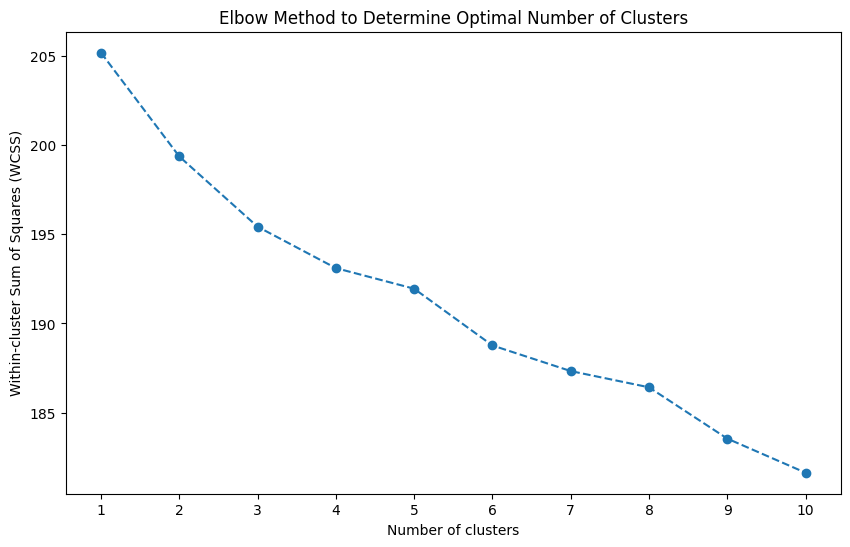

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determining the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
range_clusters = range(1, 11)  # Trying 1 to 10 clusters

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix_all)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.xticks(range_clusters)
plt.show()

In [ ]:
# Perform K-Means clustering with the chosen number of clusters (3)
optimal_clusters = 3
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(tfidf_matrix_all)

# Cluster labels for each document
optimal_cluster_labels = kmeans_optimal.labels_

# Preview of cluster labels and their distribution
clusters_distribution = np.unique(optimal_cluster_labels, return_counts=True)
clusters_distribution


(array([0, 1, 2], dtype=int32), array([ 21, 169,  92]))

In [ ]:
from collections import defaultdict

def get_top_features_cluster(tfidf_array, prediction, n_feats):
    """Function to get top features for each cluster"""
    labels = np.unique(prediction)
    dfs = defaultdict(list)
    for label in labels:
        ids = np.where(prediction == label)
        x_means = np.mean(tfidf_array[ids], axis = 0) # Mean tf-idf value for each feature in the cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # Indices with top mean scores
        features = tfidf_vectorizer_all.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        dfs[label] = best_features
    return dfs

# Extract top 10 features for each cluster
top_features_per_cluster = get_top_features_cluster(tfidf_matrix_all.toarray(), optimal_cluster_labels, 10)

# Display top features for each cluster
top_features_per_cluster


defaultdict(list,
            {0: [('assets', 0.23729449372071837),
              ('subtotal', 0.22718228165984033),
              ('liabilities', 0.1978709953197059),
              ('longterm', 0.19066905657284766),
              ('term', 0.1509565866012689),
              ('shortterm', 0.13277010006512077),
              ('advances', 0.12909945592948938),
              ('funds', 0.12018417567588377),
              ('shareholders', 0.11042619776624572),
              ('long', 0.08912379245993651)],
             1: [('assets', 0.3797396825638651),
              ('liabilities', 0.29965199993808556),
              ('financial', 0.17999720412054737),
              ('equity', 0.14413473845722238),
              ('ii', 0.08846658788388449),
              ('tax', 0.0799975274331355),
              ('net', 0.07592098635687117),
              ('iii', 0.07244838586263953),
              ('cash', 0.063892576581779),
              ('audited', 0.05918750180898077)],
             2: [('liabilities'

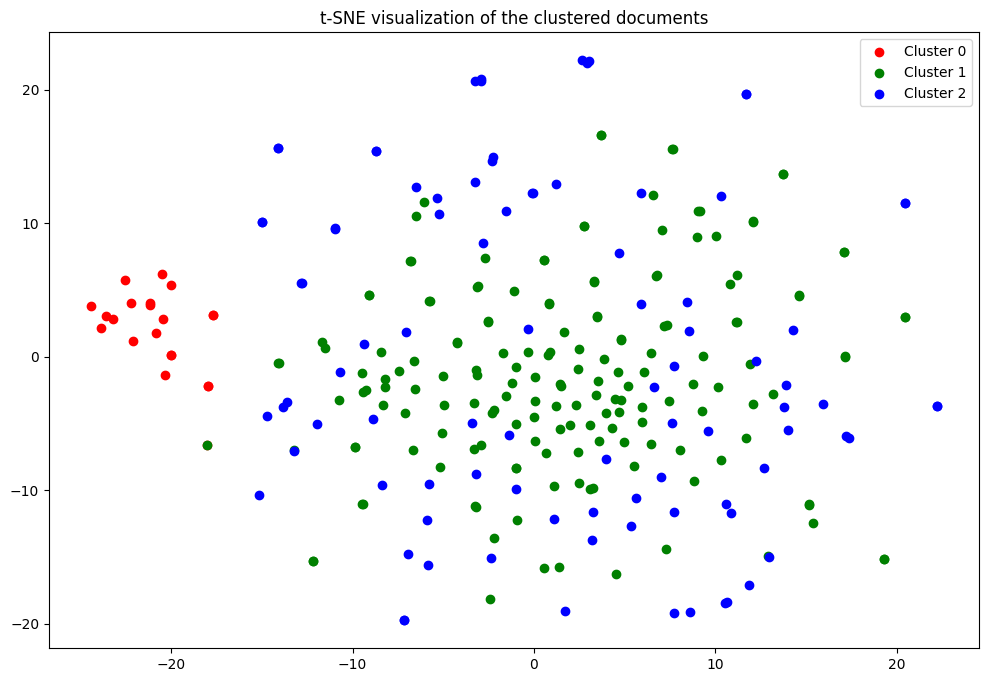

In [ ]:
from sklearn.manifold import TSNE

# Using t-SNE for dimensionality reduction to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
tfidf_matrix_reduced = tsne.fit_transform(tfidf_matrix_all.toarray())

# Plotting the clusters
plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'blue']
for i, color in zip(range(optimal_clusters), colors):
    plt.scatter(tfidf_matrix_reduced[optimal_cluster_labels == i, 0], tfidf_matrix_reduced[optimal_cluster_labels == i, 1],
                color=color, label=f'Cluster {i}')
plt.title('t-SNE visualization of the clustered documents')
plt.legend()
plt.show()